In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path="/content/sample_data/diabetes_dataset.csv"
df = pd.read_csv(path)
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
df.shape

(100000, 31)

This dataset has 100000 rows and 31 columns.

**Pre-processing data**

In [4]:
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


There are no missing values in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

The dataset contains 7 categorical variables (object types) and 24 numerical variables (integers and floats types)

In [6]:
df['diagnosed_diabetes'].value_counts()

,count
diagnosed_diabetes,
1,59998
0,40002


The number of people diagnosed with diabetes is indicated as 1, and those not diagnosed are indicated as 0, out of a total of 100,000 individuals

**Objective 1: Age and Gender Distribution of Diabetes Cases**

Select individuals with diagnosed diabetes and count cases by gender (male, female, other) and by age (18–90).


In [7]:
# Filter diabetes cases
diabetes_group = df[df['diagnosed_diabetes'] == 1]

# Count cases by age and gender
age_gender_counts = (
    diabetes_group
    .groupby(['age', 'gender'])
    .size()
    .reset_index(name='count')
)

pivot_table = age_gender_counts.pivot(index='age', columns='gender', values='count').fillna(0)

first_3 = pivot_table.index[:3]
middle_start = len(pivot_table)//2 - 1
middle_3 = pivot_table.index[middle_start:middle_start+3]
last_3 = pivot_table.index[-3:]
display_ages = list(first_3) + ['...'] + list(middle_3) + ['...'] + list(last_3)

# Create list of data rows corresponding to display_ages
data_rows = [pivot_table.loc[a].tolist() for a in first_3] + \
            [['...']*pivot_table.shape[1]] + \
            [pivot_table.loc[a].tolist() for a in middle_3] + \
            [['...']*pivot_table.shape[1]] + \
            [pivot_table.loc[a].tolist() for a in last_3]

display_table = pd.DataFrame(data_rows, index=display_ages, columns=pivot_table.columns)
display_table

gender,Female,Male,Other
18,564,523,26
19,103,74,3
20,110,97,3
...,...,...,...
53,724,744,33
54,755,718,30
55,716,739,30
...,...,...,...
88,56,53,2
89,40,44,2


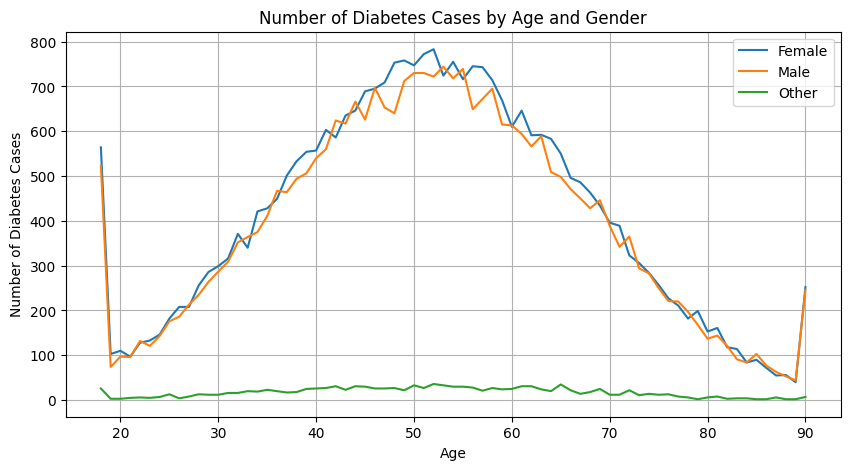

In [8]:
plt.figure(figsize=(10,5))

for gender in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[gender], label=gender)

plt.xlabel("Age")
plt.ylabel("Number of Diabetes Cases")
plt.title("Number of Diabetes Cases by Age and Gender")
plt.legend()
plt.grid(True)
plt.show()


The highest number of diabetes cases occurs among middle-aged individuals. Although a few ages show higher male counts, overall, females have more diagnosed diabetes cases.

**Objective 2: Comparison of Lifestyle Patterns between Diabetes vs Non-Diabetes Groups**

In [9]:
numeric_lifestyle_cols = [
    'physical_activity_minutes_per_week',
    'diet_score',
    'alcohol_consumption_per_week',
    'sleep_hours_per_day',
    'screen_time_hours_per_day'
]

# Add the diagnosis column for grouping
df_ls = df[numeric_lifestyle_cols + ['diagnosed_diabetes']]

# Dictionary to store descriptive stats for each group
summary_dict = {}
for group in df_ls['diagnosed_diabetes'].unique():
    summary_dict[group] = (
        df_ls[df_ls['diagnosed_diabetes'] == group][numeric_lifestyle_cols]
        .describe(include='all')
    )

for group, table in summary_dict.items():
    print(f"\n*** Diagnosed Diabetes = {group} ***")
    display(table)


*** Diagnosed Diabetes = 1 ***


,physical_activity_minutes_per_week,diet_score,alcohol_consumption_per_week,sleep_hours_per_day,screen_time_hours_per_day
count,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,111.966032,5.930369,2.004550,6.997462,6.033003
std,79.735152,1.779249,1.416026,1.093151,2.467036
min,0.000000,0.000000,0.000000,3.000000,0.500000
25%,53.000000,4.700000,1.000000,6.300000,4.300000
50%,94.000000,5.900000,2.000000,7.000000,6.000000
75%,151.000000,7.200000,3.000000,7.700000,7.700000
max,833.000000,10.000000,10.000000,10.000000,16.400000



*** Diagnosed Diabetes = 0 ***


,physical_activity_minutes_per_week,diet_score,alcohol_consumption_per_week,sleep_hours_per_day,screen_time_hours_per_day
count,40002.000000,40002.000000,40002.00000,40002.000000,40002.000000
mean,129.329184,6.091405,2.00235,6.998353,5.941670
std,89.973008,1.779164,1.42042,1.096839,2.469477
min,0.000000,0.000000,0.00000,3.000000,0.500000
25%,62.000000,4.900000,1.00000,6.300000,4.200000
50%,109.000000,6.100000,2.00000,7.000000,5.900000
75%,176.000000,7.300000,3.00000,7.700000,7.600000
max,739.000000,10.000000,10.00000,10.000000,16.800000


Compute descriptive statistics for each group and extract the median values for comparison.

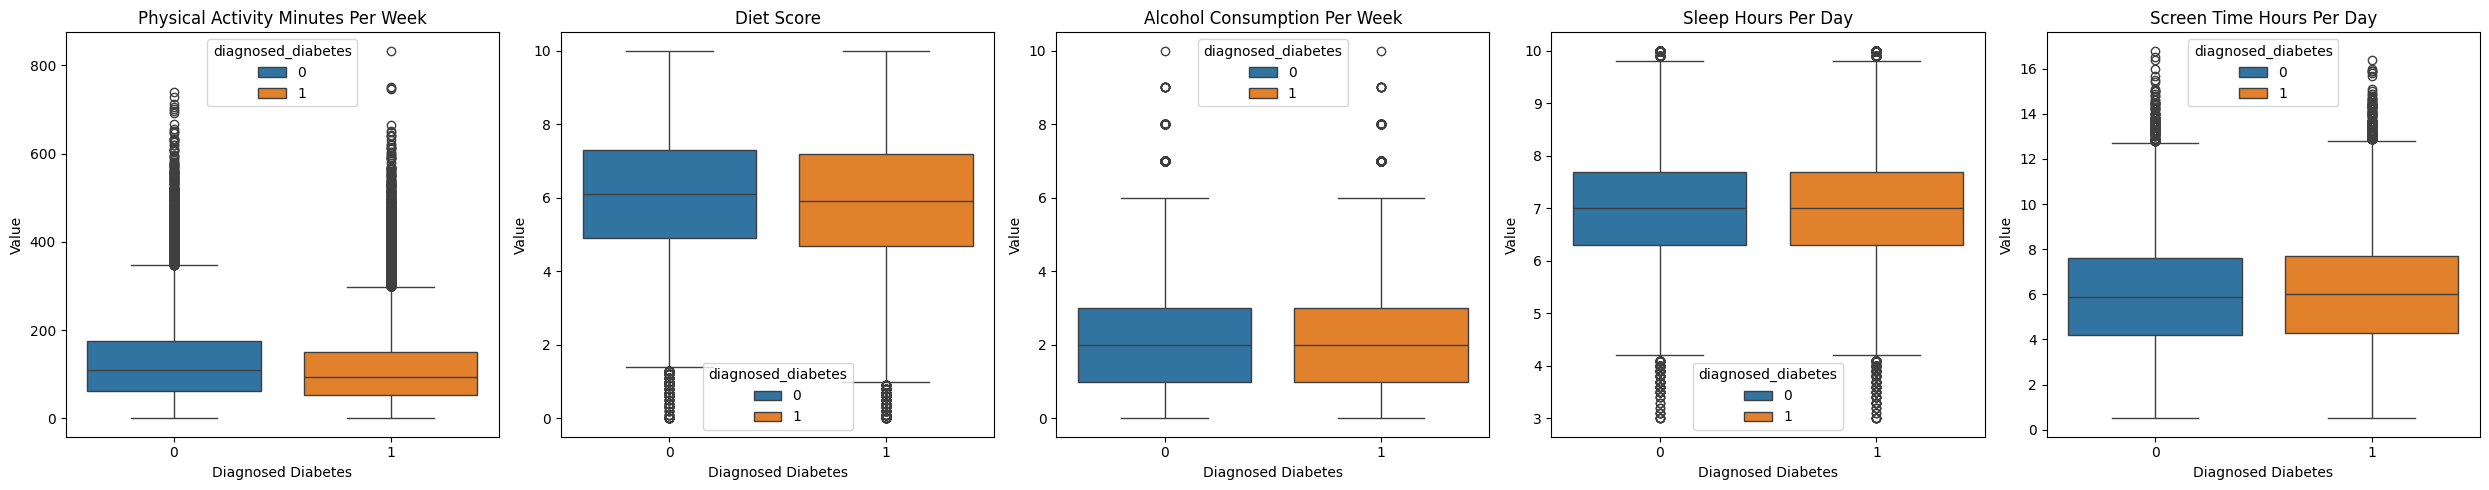

In [10]:
numeric_lifestyle_cols = [
    'physical_activity_minutes_per_week',
    'diet_score',
    'alcohol_consumption_per_week',
    'sleep_hours_per_day',
    'screen_time_hours_per_day'
]

n_cols = 5
n_rows = 1

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

# Plot each numeric lifestyle factor
for i, col in enumerate(numeric_lifestyle_cols):
    sns.boxplot(
        x='diagnosed_diabetes',
        y=col,
        data=df,
        ax=axes[i],
        hue='diagnosed_diabetes'
    )
    axes[i].set_title(col.replace('_',' ').title())
    axes[i].set_xlabel("Diagnosed Diabetes")
    axes[i].set_ylabel("Value")

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Median physical activity and diet score are higher in non-diabetes group, median screen time is higher in diabetes group, and the other two lifestyle factors show minor differences.